In [187]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [188]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combination
# np.random.uniform()method helps to return random values as arrays
# uniform()method returns random floating number between two specified numbers
lats = np.random.uniform(lat_range[0],lat_range[1],size=1500)
lngs = np.random.uniform(lng_range[0],lng_range[1],size=1500)

# Zipping the list(pairs elements from first list with elements from second list)
lat_lngs = zip(lats,lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
city_count=len(cities)
city_count

582

# Perform API Calls

In [191]:
# Url
url = "http://api.openweathermap.org/data/2.5/weather?"
# temperature in Fahrenheit
units = "imperial"
# Building the base URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Print the log
print(f"Beginning Data Retrieval")
print("------------------------------")
counter = 0
#Intializing the list
name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloud=[]
speed=[]
country=[]
date=[]

# loop through the cities to retrieve the data
for city in cities:
    counter= counter+1
    response=requests.get(query_url+city).json()
# Handle Try and Exception
# Try to access key that doesn't exist
    try:
        if response["cod"]==200:
            name.append(city)
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloud.append(response['clouds']['all'])
            speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f"Proccessing Record {counter} of {city_count} | {city} ")
# "Catching" the error lets the rest of our code execute
    except (KeyError, IndexError):
        print("City not found. Skipping.")
# Print ending log statement
print(f'-----------------------------------')
print(f'Data Retrieval Completed')
print(f'-----------------------------------')

Beginning Data Retrieval
------------------------------
Proccessing Record 1 of 582 | albany 
Proccessing Record 3 of 582 | yar-sale 
Proccessing Record 4 of 582 | punta arenas 
Proccessing Record 5 of 582 | sitka 
Proccessing Record 6 of 582 | vardo 
Proccessing Record 7 of 582 | isangel 
Proccessing Record 8 of 582 | esperance 
Proccessing Record 9 of 582 | ostrovnoy 
Proccessing Record 10 of 582 | lebu 
Proccessing Record 11 of 582 | provideniya 
Proccessing Record 12 of 582 | kapaa 
Proccessing Record 13 of 582 | caconda 
Proccessing Record 14 of 582 | karratha 
Proccessing Record 15 of 582 | yara 
Proccessing Record 16 of 582 | bluff 
Proccessing Record 17 of 582 | malanje 
Proccessing Record 18 of 582 | mataura 
Proccessing Record 19 of 582 | ancud 
Proccessing Record 20 of 582 | luderitz 
Proccessing Record 21 of 582 | andros town 
Proccessing Record 22 of 582 | horki 
Proccessing Record 23 of 582 | riyadh 
Proccessing Record 24 of 582 | busselton 
Proccessing Record 25 of 582 |

Proccessing Record 209 of 582 | ahipara 
Proccessing Record 210 of 582 | jasper 
Proccessing Record 211 of 582 | gaoua 
Proccessing Record 212 of 582 | puri 
Proccessing Record 213 of 582 | hithadhoo 
Proccessing Record 214 of 582 | port macquarie 
Proccessing Record 215 of 582 | port blair 
Proccessing Record 216 of 582 | torbay 
Proccessing Record 217 of 582 | port lincoln 
Proccessing Record 218 of 582 | bilma 
Proccessing Record 221 of 582 | bontang 
Proccessing Record 222 of 582 | piacabucu 
Proccessing Record 223 of 582 | poncitlan 
Proccessing Record 224 of 582 | hasaki 
Proccessing Record 225 of 582 | sao luis 
Proccessing Record 226 of 582 | alta floresta 
Proccessing Record 227 of 582 | cabo san lucas 
Proccessing Record 228 of 582 | asau 
Proccessing Record 230 of 582 | masingbi 
Proccessing Record 231 of 582 | katsuura 
Proccessing Record 232 of 582 | tiksi 
Proccessing Record 233 of 582 | sao jose dos campos 
Proccessing Record 234 of 582 | bom jesus dos perdoes 
Proccessi

Proccessing Record 429 of 582 | sioux lookout 
Proccessing Record 430 of 582 | carahue 
Proccessing Record 431 of 582 | kitwe 
Proccessing Record 432 of 582 | bom jesus 
Proccessing Record 433 of 582 | raudeberg 
Proccessing Record 434 of 582 | waipawa 
Proccessing Record 435 of 582 | santiago del estero 
Proccessing Record 436 of 582 | ponce 
Proccessing Record 437 of 582 | faanui 
Proccessing Record 438 of 582 | damoh 
Proccessing Record 439 of 582 | mantua 
Proccessing Record 440 of 582 | batagay-alyta 
Proccessing Record 442 of 582 | chernigovka 
Proccessing Record 443 of 582 | barra do garcas 
Proccessing Record 444 of 582 | nacala 
Proccessing Record 445 of 582 | leh 
Proccessing Record 446 of 582 | narsaq 
Proccessing Record 447 of 582 | subachoque 
Proccessing Record 448 of 582 | arraial do cabo 
Proccessing Record 449 of 582 | fushun 
Proccessing Record 450 of 582 | high level 
Proccessing Record 451 of 582 | kralendijk 
Proccessing Record 452 of 582 | kulhudhuffushi 
Proccess

# Convert Raw Data to DataFrame

In [192]:
# Convert the raw data from the response into DataFrame
# Create Dictionary
city_dict = {"City":name,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": max_temp,
            "Humidity":humidity,
            "Cloudiness":cloud,
            "Wind Speed":speed,
            "Country":country,
            "Date":date}
# Create DataFrame
city_data = pd.DataFrame(city_dict)
city_data


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,46.81,72,6,3.31,US,1666412740
1,yar-sale,66.8333,70.8333,30.04,98,100,3.47,RU,1666412740
2,punta arenas,-53.1500,-70.9167,46.11,69,98,28.05,CL,1666412601
3,sitka,57.0531,-135.3300,42.69,87,100,5.75,US,1666412741
4,vardo,70.3705,31.1107,33.78,93,75,23.02,NO,1666412741
...,...,...,...,...,...,...,...,...,...
529,ganzhou,28.8184,115.4327,84.60,35,6,5.30,CN,1666412928
530,miles city,46.4083,-105.8406,49.17,81,100,4.61,US,1666412928
531,mafinga,-7.2500,35.0667,66.69,54,34,4.59,TZ,1666412929
532,bosaso,11.2842,49.1816,80.58,83,0,5.75,SO,1666412929


In [193]:
# Writing the cities data to the CSV file
cities_csv= city_data[["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]]
cities_csv.to_csv(output_data_file,header=True)


In [194]:
# Descriptive Statistics
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02
mean,19.419789,12.719670,60.168352,72.662921,57.488764,7.274026,1.666413e+09
std,33.256924,90.111934,18.743736,20.689581,40.083904,5.395399,8.176704e+01
min,-54.800000,-175.200000,-1.430000,11.000000,0.000000,0.000000,1.666412e+09
25%,-8.217675,-66.198000,46.127500,62.000000,15.250000,3.440000,1.666413e+09
50%,23.325000,16.144350,63.480000,77.000000,69.000000,5.750000,1.666413e+09
75%,48.224325,89.764375,75.777500,88.000000,99.000000,10.120000,1.666413e+09
max,78.218600,179.316700,94.100000,100.000000,100.000000,28.050000,1.666413e+09


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs

In [195]:
# Get the date of data retrived
time = time.localtime(city_data['Date'][0])
date = f"{time.tm_mon}-{time.tm_mday}-{time.tm_year}"
time

time.struct_time(tm_year=2022, tm_mon=10, tm_mday=22, tm_hour=0, tm_min=25, tm_sec=40, tm_wday=5, tm_yday=295, tm_isdst=1)

# Latitude vs. Temperature Plot

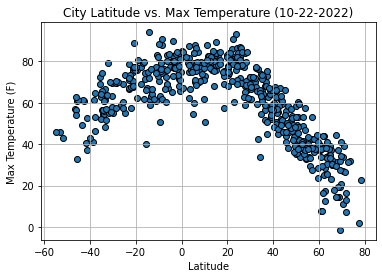

In [196]:
# Create a scatter plot for latitude vs Temperature
plt.scatter(city_data["Lat"],city_data["Max Temp"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("Output_data/City_Lat_Max_Temp.png")

# Show Plot
plt.show()



# Latitude vs. Humidity Plot

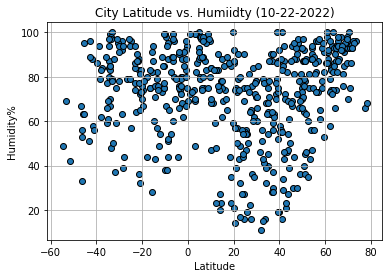

In [197]:
# Create a scatter plot for latitude vs Humidity
plt.scatter(city_data["Lat"],city_data["Humidity"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Humiidty ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Humidity%")

# Save the figure
plt.savefig("Output_data/City_Lat_Humidity.png")

# Show Plot
plt.show()


# Latitude vs. Cloudiness Plot

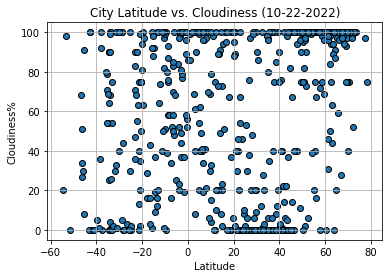

In [198]:
# Create a scatter plot for latitude vs Cloudiness
plt.scatter(city_data["Lat"],city_data["Cloudiness"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness%")

# Save the figure
plt.savefig("Output_data/City_Lat_Cloudiness.png")

# Show Plot
plt.show()


# Latitude vs. Wind Speed Plot

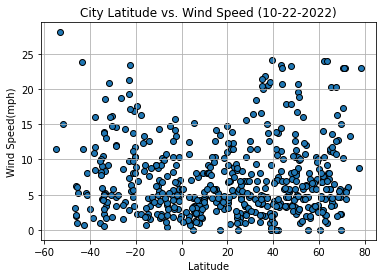

In [199]:
# Create a scatter plot for latitude vs Wind Speed
plt.scatter(city_data["Lat"],city_data["Wind Speed"],marker='o',edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

# Save the figure
plt.savefig("Output_data/City_Lat_WindSpeed.png")

# Show Plot
plt.show()


# Linear Regression

In [200]:
# Find the latitude values >=0 for Northern Hemisphere using loc
north_data = city_data.loc[city_data["Lat"]>=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
north_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,42.6001,46.81,72,6,3.31
1,66.8333,30.04,98,100,3.47
3,57.0531,42.69,87,100,5.75
4,70.3705,33.78,93,75,23.02
7,68.0531,31.28,85,100,16.33


# Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.779096906373248


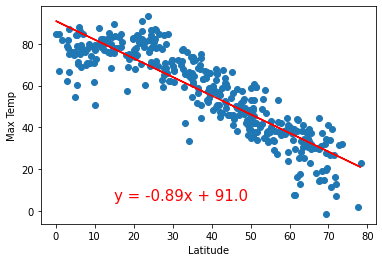

In [201]:
# Perform a linear regression on Maximum temperature vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(15,5),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
# print(rvalue**2)
print(f"The r-value is {rvalue**2}")

# Show plot
plt.show()

# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [202]:
# Find the latitude <=0 for Southern Hemisphere using loc
south_data = city_data.loc[city_data["Lat"]<=0][["Lat","Max Temp","Humidity","Cloudiness","Wind Speed"]]
south_data.head()

,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
2,-53.1500,46.11,69,98,28.05
5,-19.5500,76.01,74,100,17.54
6,-33.8667,62.44,67,68,13.85
8,-37.6167,46.54,84,0,11.70
11,-13.7333,61.34,79,100,1.50


The r-value is 0.458827402505918


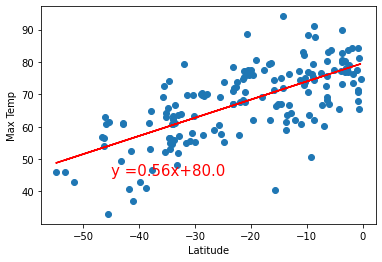

In [203]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Max Temp"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,45),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.04399043890368899


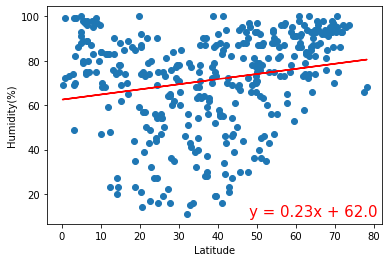

In [204]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.011494299086953853


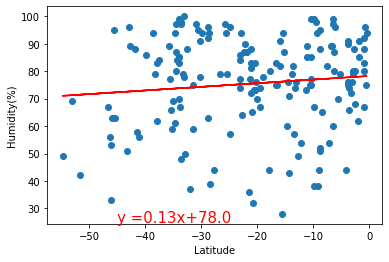

In [205]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Humidity"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0873862478812898


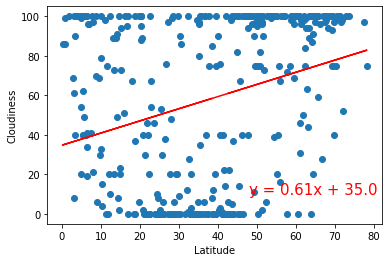

In [206]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(48,10),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.054440337021798575


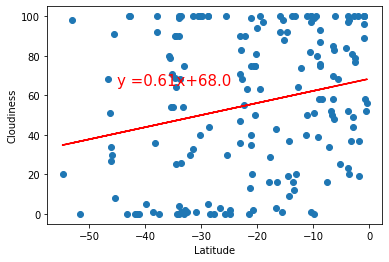

In [207]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Cloudiness"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,65),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.032886317076067866


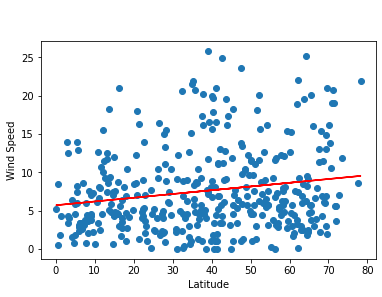

In [163]:
# Perform a linear regression on Humidity(%) vs. latitude
x_values = north_data["Lat"]
y_values = north_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(5,30),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()

# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.035276771666586895


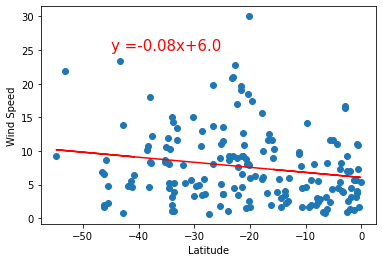

In [164]:
# Perform a linear regression on temperature vs. latitude
x_values = south_data["Lat"]
y_values = south_data["Wind Speed"]
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
regress_values = slope * x_values + intercept

# Create line equation string
line_eq = "y =" + str(round(slope,2))+"x+"+ str(round(intercept))

#create plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-45,25),fontsize=15,color="red") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r square value
print(f"The r-value is {rvalue**2}")

#show Plot
plt.show()